In [1]:
from ambiance import Atmosphere
import numpy as np

from global_variables.solver import EquationSystem
from global_variables.registry import VariableRegistry, Variable

registry = VariableRegistry("aero_vars.yaml")

In [2]:
system = EquationSystem(registry, targets={'R'})
R_solver = system.create_solver()
R_solver

{'R': <function _lambdifygenerated(C_D0, S_, TSFC, V, W_max, W_pax, We_Wmax, b, e, n_pax, rho_h)>}

In [43]:
def velocity(M,h):
  atmo = Atmosphere(h * 0.3048)
  return atmo.speed_of_sound[-1] * M / 0.3048
def rho_func(h):
  atmo = Atmosphere(h * 0.3048)
  return atmo.density[-1] * 0.00194032

In [70]:
args = {
    "C_D0":0.02,
    "S_":9540.865,
    "TSFC":.45/3600,
    "V":velocity(M=.9,h=3.6e4),
    #"W_max":2e6,
    "W_pax":205,
    "We_Wmax":.46,
    "b":315,
    "e":0.9,
    "n_pax":1254,
    "rho_h":rho_func(3.6e4)
}

from scipy.optimize import minimize
def find_max_weight(desired_range,max_weight=2e6,**kwargs):
    return minimize(
        lambda w_max: (R_solver['R'](W_max=w_max,**kwargs) - desired_range)**2,
        x0=max_weight,
        #method="Nelder-Mead"
    )
out = find_max_weight(1e4*6076.12,max_weight=1.75e6,**args)
print(out['x'])

[1742056.27968414]


In [73]:
cTs = np.linspace(.15,.45,20)
W_maxs = []
for cT in cTs:
    args = {
        "C_D0":0.02,
        "S_":9540.865,
        "TSFC":cT/3600,
        "V":velocity(M=.9,h=3.6e4),
        #"W_max":2e6,
        "W_pax":205,
        "We_Wmax":.46,
        "b":315,
        "e":0.9,
        "n_pax":1254,
        "rho_h":rho_func(3.6e4)
    }
    out = find_max_weight(1e4*6076.12,max_weight=1.75e6,**args)
    W_maxs.append(out['x'][0])

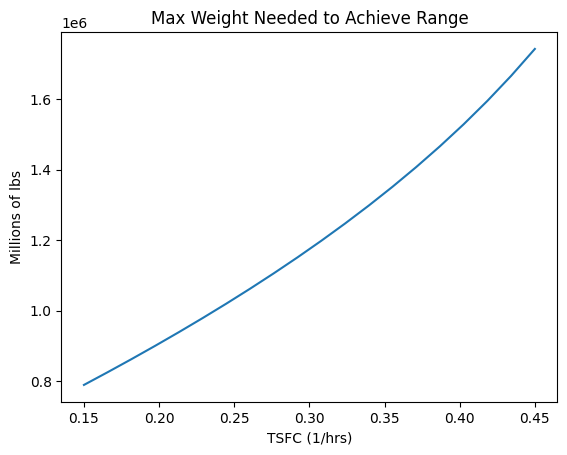

In [78]:
import matplotlib.pyplot as plt 
plt.plot(cTs,W_maxs)
plt.xlabel("TSFC (1/hrs)")
plt.ylabel("Millions of lbs")
plt.title("Max Weight Needed to Achieve Range")
plt.savefig("../assets/max_weight_vs_tsfc.png")